# Regularization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.cross_validation import train_test_split 

In [13]:
data_credit = pd.read_csv("C:\\Users\\apoghosyan\\Desktop\\YSU_ML\\ISLR_Data\\Hitters.csv")
data_credit = data_credit.dropna()
print(data_credit.shape)
print(data_credit.columns)
data_credit = data_credit.drop(['Unnamed: 0'], axis = 1)
print(data_credit.columns)
data_credit.head(5)

(263, 21)
Index(['Unnamed: 0', 'AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years',
       'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')
Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division',
       'PutOuts', 'Assists', 'Errors', 'Salary', 'NewLeague'],
      dtype='object')


,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [14]:
cat_list = ["League","Division","NewLeague"]
df_dummies= pd.get_dummies(data_credit[cat_list], drop_first = True)
print(df_dummies.head())
add = pd.concat([data_credit, df_dummies], axis  = 1)
add.drop(cat_list, inplace = True, axis = 1)
print(add.head())


X = add.drop("Salary", axis = 1)
names = X.columns
y = add.Salary 


   League_N  Division_W  NewLeague_N
1         1           1            1
2         0           1            0
3         1           0            1
4         1           0            1
5         0           1            0
   AtBat  Hits  HmRun  Runs  RBI  Walks  Years  CAtBat  CHits  CHmRun  CRuns  \
1    315    81      7    24   38     39     14    3449    835      69    321   
2    479   130     18    66   72     76      3    1624    457      63    224   
3    496   141     20    65   78     37     11    5628   1575     225    828   
4    321    87     10    39   42     30      2     396    101      12     48   
5    594   169      4    74   51     35     11    4408   1133      19    501   

   CRBI  CWalks  PutOuts  Assists  Errors  Salary  League_N  Division_W  \
1   414     375      632       43      10   475.0         1           1   
2   266     263      880       82      14   480.0         0           1   
3   838     354      200       11       3   500.0         1           0 

## Ridge Regression

In [15]:
names

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat',
       'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'PutOuts', 'Assists',
       'Errors', 'League_N', 'Division_W', 'NewLeague_N'],
      dtype='object')

In [16]:
ridge = Ridge()
ridge.set_params(alpha = 0)
ridge.fit(scale(X),y)
print("Ridge Coefficients -> ", ridge.coef_)
coef_list = ridge.coef_ 
print(np.sum(coef_list**2))
print("score->", ridge.score(scale(X),y))

lin = LinearRegression()
lin.fit(scale(X),y)
print("Linear Regression Coefficients ->", lin.coef_)
print(np.sum(coef_list**2))
print(lin.score(scale(X),y))

Ridge Coefficients ->  [-291.0945557   337.83047948   37.85383676  -60.57247861  -26.99498379
  135.07389695  -16.69335888 -391.03865466   86.68761664  -14.18172332
  480.74713477  260.68988581 -213.89225864   78.76129639   53.73248973
  -22.16086217   31.2487626   -58.41406355  -12.34881102]
742796.589612
score-> 0.546115861913
Linear Regression Coefficients -> [-291.0945557   337.83047948   37.85383676  -60.57247861  -26.99498379
  135.07389695  -16.69335888 -391.03865466   86.68761664  -14.18172332
  480.74713477  260.68988581 -213.89225864   78.76129639   53.73248973
  -22.16086217   31.2487626   -58.41406355  -12.34881102]
742796.589612
0.546115861913


In [96]:
ridge = Ridge()
ridge.set_params(alpha = 0.400170056022409)
ridge.fit(scale(X),y)
print(ridge.coef_)
coef_list = ridge.coef_ 
print(np.sum(coef_list**2))
print("score ->", ridge.score(scale(X),y))

[-283.9406028   318.96065661   27.31700628  -44.32003908  -17.35283925
  130.28470426  -28.424108   -307.26885819  119.02464589   18.43750691
  392.59148099  200.58516593 -199.21187802  -31.2216272    59.35681941
   78.75875027   50.82567564  -23.01650522   13.19849232]
560108.7892532294
score -> 0.5455120150379338


In [97]:
ridge = Ridge()
ridge.set_params(alpha = 100)
ridge.fit(scale(X),y)
print(ridge.coef_)
coef_list = ridge.coef_ 
print(np.sum(coef_list**2))
print("score -> ", ridge.score(scale(X),y))

[-6.61866192e-03  4.94674983e+01 -8.59717534e-01  2.88919699e+01
  2.24255191e+01  4.11835537e+01 -2.73765357e+00  2.49150494e+01
  4.46369025e+01  3.88517335e+01  4.52257760e+01  4.73204631e+01
  3.55893206e+00 -1.48781877e+01  4.85649076e+01  5.66713180e+01
  7.33515093e+00 -1.34937195e+01 -2.81754362e+00]
19944.30766433788
score ->  0.4798992533510438


In [98]:
ridge = Ridge()
ridge.set_params(alpha = 1000000)
ridge.fit(scale(X),y)
print(ridge.coef_)
coef_list = ridge.coef_ 
print(np.sum(coef_list**2))
print("score ->", ridge.score(scale(X),y))

[ 0.04666088  0.05186084  0.04053656  0.04963197  0.05312473  0.05247341
  0.04734229  0.06218041  0.0648768   0.06204106  0.06650412  0.06701109
  0.05788527  0.00167335  0.02278178  0.03554374  0.00300839 -0.00064143
  0.00032315]
0.042773533738089814
score -> 0.0016059356405795366


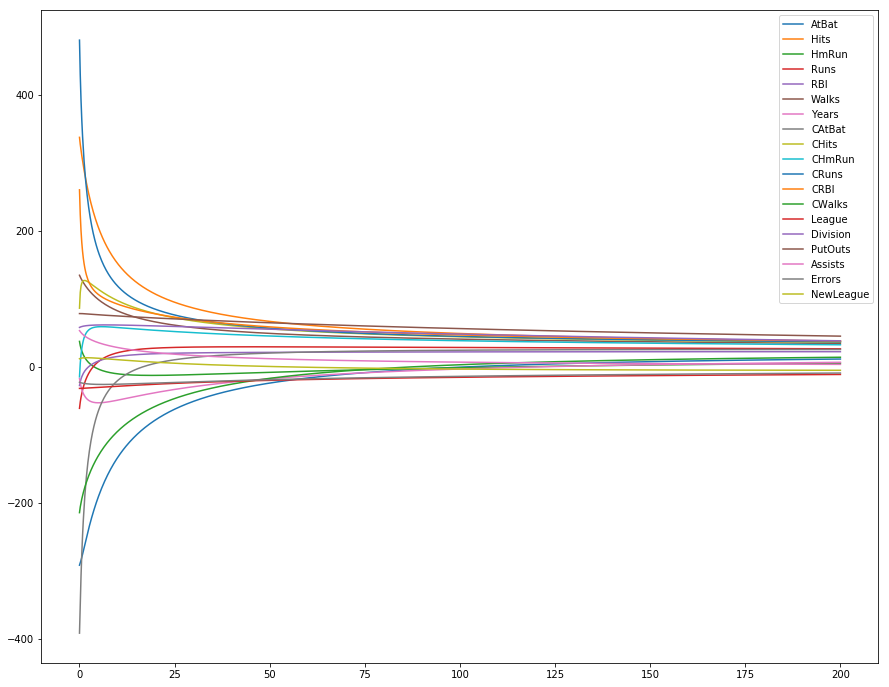

In [102]:
alphas = np.linspace(0,200,1000)
ridge = Ridge()
coef_list = []
for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(scale(X),y)
    coef_list.append(ridge.coef_)
coef_list

plt.figure(figsize = (15,12))
plt.plot(alphas, coef_list)
plt.legend(names)
plt.show()

## Lasso

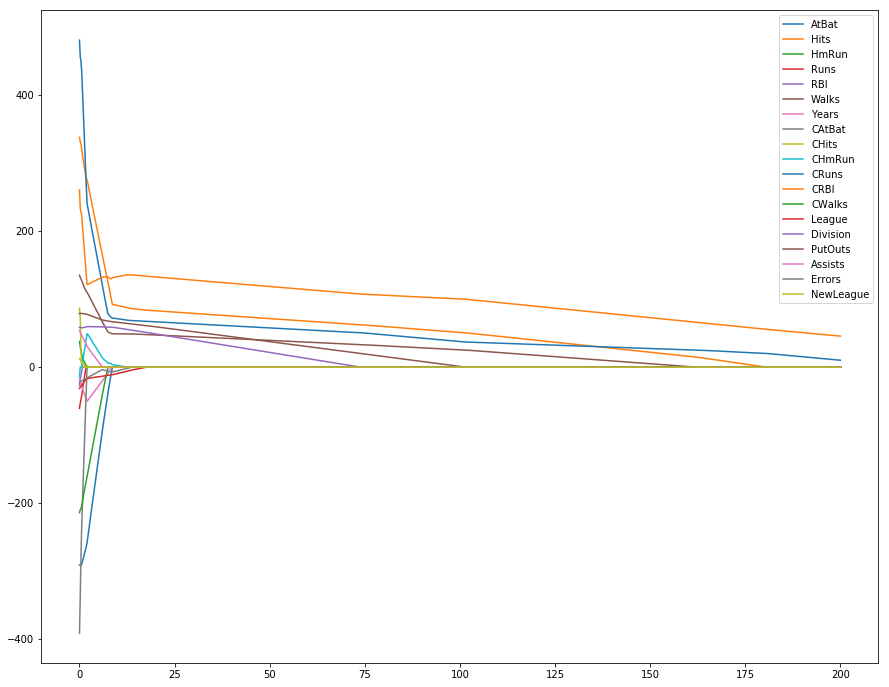

In [103]:
alphas = np.linspace(0.0001,200,1000)
lasso = Lasso( max_iter=100000)
coef_list = []
for a in alphas:
    lasso.set_params(alpha = a)
    lasso.fit(scale(X),y)
    coef_list.append(lasso.coef_)
coef_list

plt.figure(figsize = (15,12))
plt.plot(alphas, coef_list)
plt.legend(names)
plt.show()

## Ridge CV

In [104]:
alphas = np.linspace(0.00001,500,2500)
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', cv = 10)
ridgecv.fit(scale(X),y)

RidgeCV(alphas=array([1.0000e-05, 2.0009e-01, ..., 4.9980e+02, 5.0000e+02]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring='neg_mean_squared_error', store_cv_values=False)

In [105]:
ridgecv.alpha_

2.801130392156863

In [106]:
ridgecv.coef_

array([-229.23290307,  245.79325599,    4.66520453,   -5.57493766,
          2.39911804,  110.85213115,  -50.0662138 , -115.63017494,
        123.2981852 ,   56.25118054,  220.4723061 ,  121.09254664,
       -154.34987309,  -30.46244036,   61.50798416,   77.87122951,
         40.92777612,  -24.91103477,   13.75337784])

In [107]:
ridgecv.score(scale(X),y)

0.5384775224360168

In [108]:
pd.Series(ridgecv.coef_.flatten(), index = names)

AtBat       -229.232903
Hits         245.793256
HmRun          4.665205
Runs          -5.574938
RBI            2.399118
Walks        110.852131
Years        -50.066214
CAtBat      -115.630175
CHits        123.298185
CHmRun        56.251181
CRuns        220.472306
CRBI         121.092547
CWalks      -154.349873
League       -30.462440
Division      61.507984
PutOuts       77.871230
Assists       40.927776
Errors       -24.911035
NewLeague     13.753378
dtype: float64

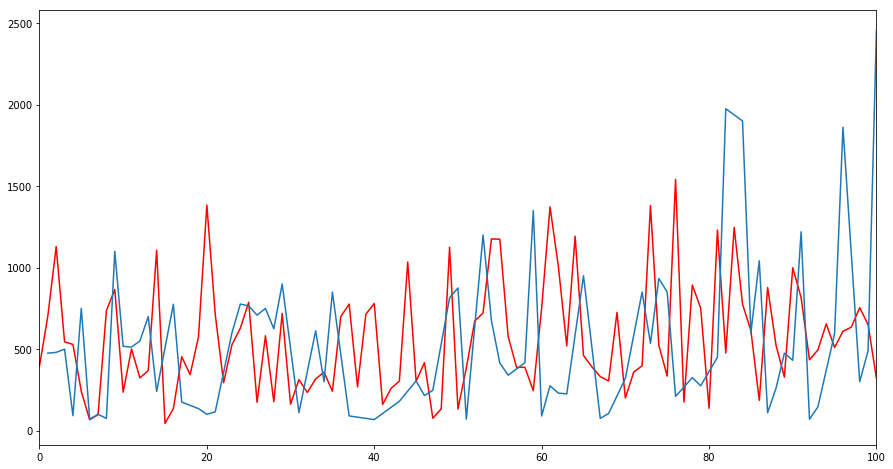

In [111]:
plt.figure(figsize = (15,8))
plt.plot(ridgecv.predict(scale(X)),color = "red")
plt.xlim(0,100)
plt.plot(y)

## Lasso CV

In [112]:
alphas = np.linspace(0.001,100,2500)
lassocv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000, verbose = True)
lassocv.fit(scale(X),y)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

LassoCV(alphas=array([1.00000e-03, 4.10156e-02, ..., 9.99600e+01, 1.00000e+02]),
    copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=100000,
    n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=True)

In [113]:
lassocv.alpha_

2.5219831932773107

In [114]:
lassocv.coef_

array([-235.66593425,  260.79891185,    0.        ,   -0.        ,
          0.        ,  104.48443046,  -46.21038441,   -0.        ,
          0.        ,   45.32565781,  224.48515303,  122.82747605,
       -145.09263806,  -16.21860557,   59.56816514,   76.55450847,
         26.38170061,  -13.88724325,    0.        ])

In [115]:
lassocv.score(scale(X),y)

0.5343845416589251

In [116]:
pd.Series(lassocv.coef_.flatten(), index = names)

AtBat       -235.665934
Hits         260.798912
HmRun          0.000000
Runs          -0.000000
RBI            0.000000
Walks        104.484430
Years        -46.210384
CAtBat        -0.000000
CHits          0.000000
CHmRun        45.325658
CRuns        224.485153
CRBI         122.827476
CWalks      -145.092638
League       -16.218606
Division      59.568165
PutOuts       76.554508
Assists       26.381701
Errors       -13.887243
NewLeague      0.000000
dtype: float64

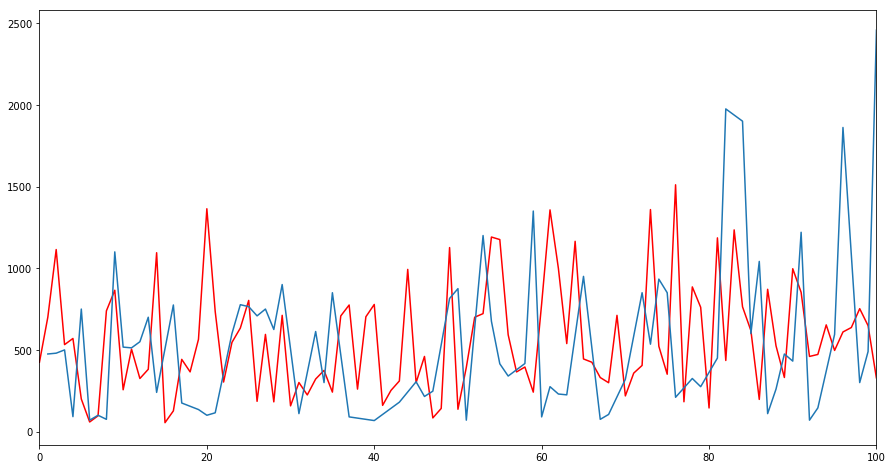

In [118]:
plt.figure(figsize = (15,8))
plt.plot(lassocv.predict(scale(X)),color = "red")
plt.xlim(0,100)
plt.plot(y)

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)  

In [145]:
X_train.shape

(210, 19)

In [146]:
X_test.shape

(53, 19)

In [147]:
X.shape

(263, 19)

In [149]:
X_test.shape[0]/X.shape[0]

0.20152091254752852